In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("moderm.csv")
df

,Unnamed: 0,property_id,property_type,price,city,province_name,latitude,longitude,baths,bedrooms,Area Category,Area_Total_Marla
0,0,237062,0,10000000,0,0.0,33.679890,73.012640,2,2,0.0,4.0
1,1,346905,0,6900000,0,0.0,33.700993,72.971492,3,3,5.0,5.6
2,2,386513,1,16500000,0,0.0,33.631486,72.926559,6,5,5.0,8.0
3,3,656161,1,43500000,0,0.0,33.707573,73.151199,4,4,4.0,40.0
4,4,841645,1,7000000,0,0.0,33.492591,73.301339,3,3,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
110221,110221,17355248,1,26500000,1,2.0,25.029909,67.137192,2,6,5.0,9.6
110222,110222,17355249,1,12500000,1,2.0,25.017951,67.136393,2,3,5.0,8.0
110223,110223,17355250,1,27000000,1,2.0,25.015384,67.116330,2,6,5.0,9.6
110224,110224,17355251,1,11000000,1,2.0,25.013265,67.120818,2,3,5.0,7.8


In [4]:

# Split into features (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price'].astype('int')

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)


In [5]:
print(f'shape of X_train {X_train.shape} & shape of y_train {y_train.shape}')
print(f'shape of X_test {X_test.shape} & shape of y_test {y_test.shape}')

shape of X_train (82669, 11) & shape of y_train (82669,)
shape of X_test (27557, 11) & shape of y_test (27557,)


In [6]:
#Feature scaling for better Performance 

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)

In [8]:
import tensorflow as tf
from tensorflow import keras

# Define the ANN model


model = keras.Sequential([
    keras.layers.Dense(11, activation="tanh", input_shape=(X_train.shape[1],)),
    keras.layers.Dense(20, activation='elu'),
    keras.layers.Dense(24, activation="elu"),
    keras.layers.Dense(12, activation="elu"),
    keras.layers.Dense(6, activation ="elu"),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(1)  # Output layer with a single neuron for regression
])


# Compile the model with the optimizer and loss function
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0012, momentum=0.04),
              loss='mean_absolute_error')

# Train the model on the training data (175 epoch good with model at accuracy of 70 plus)
history = model.fit(X_train, y_train, epochs=200, batch_size=5,validation_data=(X_test,y_test), verbose=1)

Epoch 1/200
16534/16534 [==============================] - 29s 2ms/step - loss: 13432574.0000 - val_loss: 9530925.0000
Epoch 2/200
16534/16534 [==============================] - 28s 2ms/step - loss: 8864071.0000 - val_loss: 8152919.0000
Epoch 3/200
16534/16534 [==============================] - 27s 2ms/step - loss: 8262919.5000 - val_loss: 8096253.0000
Epoch 4/200
16534/16534 [==============================] - 27s 2ms/step - loss: 8225987.5000 - val_loss: 8016321.5000
Epoch 5/200
16534/16534 [==============================] - 27s 2ms/step - loss: 8195799.5000 - val_loss: 8195881.0000
Epoch 6/200
16534/16534 [==============================] - 28s 2ms/step - loss: 8174455.0000 - val_loss: 8003840.0000
Epoch 7/200
16534/16534 [==============================] - 27s 2ms/step - loss: 8162949.0000 - val_loss: 8032264.0000
Epoch 8/200
16534/16534 [==============================] - 27s 2ms/step - loss: 8146746.0000 - val_loss: 8307231.5000
Epoch 9/200
16534/16534 [==============================

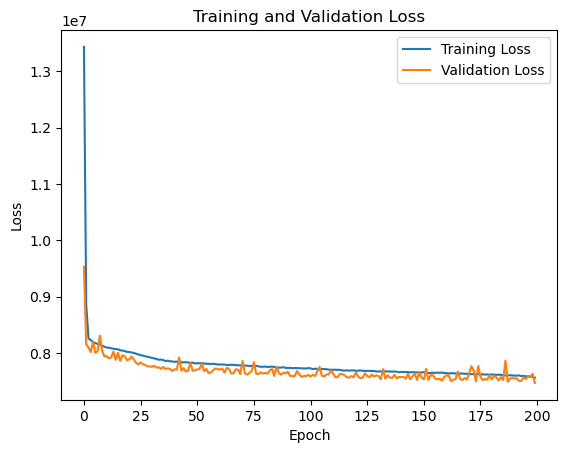

In [9]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [10]:
amn2=model.predict(X_test)

862/862 [==============================] - 1s 1ms/step


In [11]:
from sklearn.metrics import r2_score
r2_score(y_test, amn2)

0.7433185775347493